In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


In [34]:
def get_genre_ratings(ratings, movies, genres, column_names):
    average_ratinggs = pd.DataFrame()
    for genre in genres:
        movies_belong_to_type = movies[movies['genres'].str.contains(genre)]
        average_ratinggs_per_type = ratings[ratings['movieId'].isin(movies_belong_to_type['movieId'])].loc[:, ['userId','rating']].groupby('userId')['rating'].mean().round(2)
        average_ratinggs = pd.concat([average_ratinggs, average_ratinggs_per_type], axis = 1)
    average_ratinggs.columns = column_names
    return average_ratinggs

In [35]:
genres = ['Romance', 'Sci-Fi']
column_names = ['avg_romance_rating', 'avg_scifi_rating']
genre_ratings = get_genre_ratings(ratings, movies, genres, column_names)
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [36]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


In [44]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)


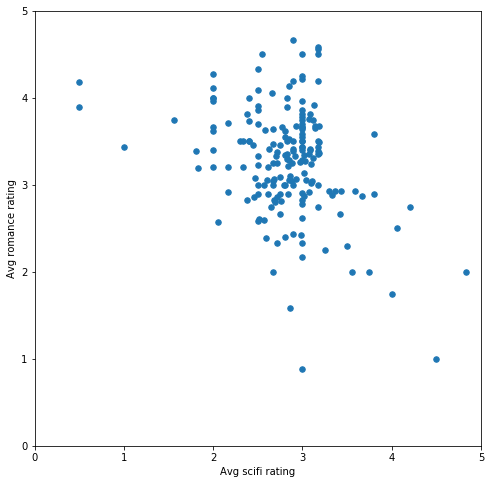

In [45]:
%matplotlib inline

draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [47]:
X = biased_dataset[['avg_romance_rating', 'avg_scifi_rating']].values

In [54]:
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    
    new_data = pd.concat([biased_dataset, pd.DataFrame({'group':predictions})], axis = 1)
    plt.scatter(new_data['avg_scifi_rating'], new_data['avg_romance_rating'],c = new_data['group'], s = 30)

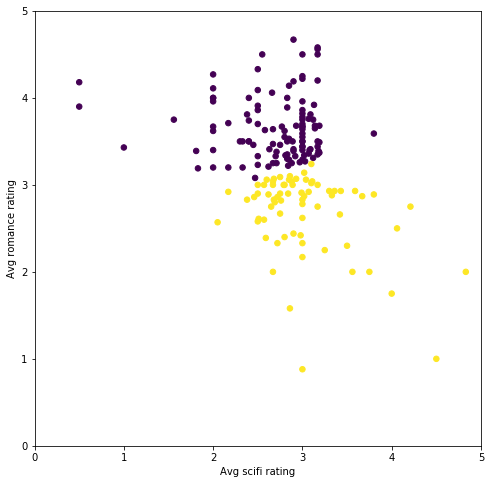

In [55]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
draw_clusters(biased_dataset, predictions)

In [58]:
possible_k_values = range(2, len(X) + 1, 5)
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]
errors_per_k

/Users/cjz/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)


[0.3558817876472827,
 0.3899299176402718,
 0.34589842696272316,
 0.3795719872714824,
 0.3763528574988481,
 0.379625955515884,
 0.3797161317921754,
 0.3676157470006136,
 0.38022027158326027,
 0.3821864863516942,
 0.3809202935183373,
 0.3410739247001703,
 0.35647184218039296,
 0.3480573670506069,
 0.35490981782588255,
 0.34647392672132005,
 0.3385425845514486,
 0.3380821587039436,
 0.3244332726685372,
 0.31288995867458125,
 0.2974829869191488,
 0.2928688110545402,
 0.27722901311463977,
 0.28415779871332625,
 0.2580269745612695,
 0.25597212504284966,
 0.24593258698181955,
 0.23032604465441087,
 0.2169634695459957,
 0.19510674850189857,
 0.17619604183723436,
 0.15979461216221783,
 0.15448526369463694,
 0.1292096072995916,
 0.10075966098922676,
 0.06423012016322224,
 0.0546448087431694]

In [59]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3899299176402718),
 (12, 0.34589842696272316),
 (17, 0.3795719872714824),
 (22, 0.3763528574988481),
 (27, 0.379625955515884),
 (32, 0.3797161317921754),
 (37, 0.3676157470006136),
 (42, 0.38022027158326027),
 (47, 0.3821864863516942),
 (52, 0.3809202935183373),
 (57, 0.3410739247001703),
 (62, 0.35647184218039296),
 (67, 0.3480573670506069),
 (72, 0.35490981782588255),
 (77, 0.34647392672132005),
 (82, 0.3385425845514486),
 (87, 0.3380821587039436),
 (92, 0.3244332726685372),
 (97, 0.31288995867458125),
 (102, 0.2974829869191488),
 (107, 0.2928688110545402),
 (112, 0.27722901311463977),
 (117, 0.28415779871332625),
 (122, 0.2580269745612695),
 (127, 0.25597212504284966),
 (132, 0.24593258698181955),
 (137, 0.23032604465441087),
 (142, 0.2169634695459957),
 (147, 0.19510674850189857),
 (152, 0.17619604183723436),
 (157, 0.15979461216221783),
 (162, 0.15448526369463694),
 (167, 0.1292096072995916),
 (172, 0.10075966098922676),
 (177, 0.06423012016322224)

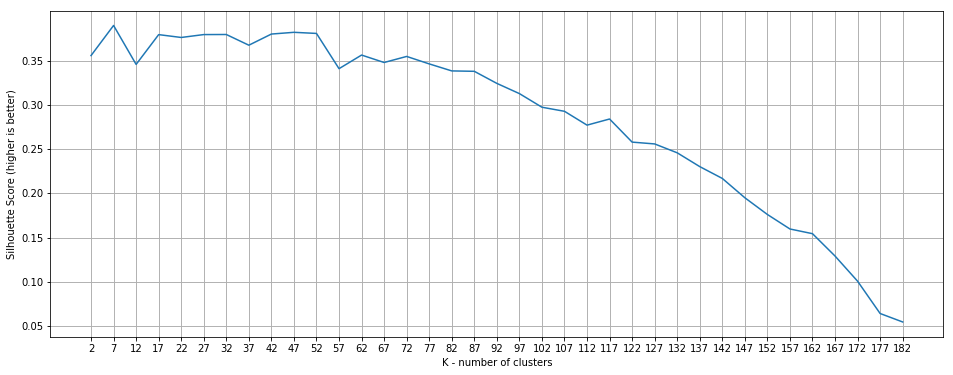

In [60]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

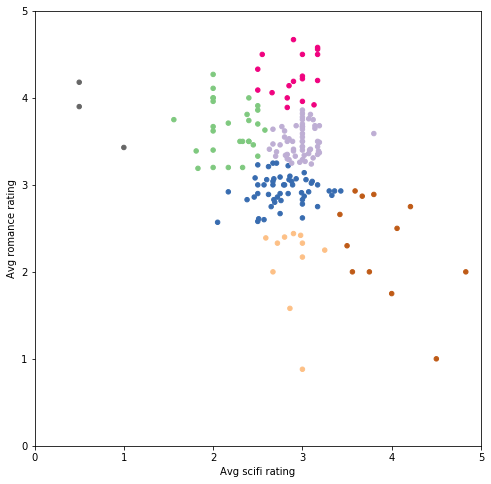

In [61]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 

In [62]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [162]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values
X_with_action

array([[2.4 , 3.5 , 2.8 ],
       [3.14, 3.65, 3.47],
       [2.75, 2.9 , 3.27],
       [3.36, 2.93, 3.29],
       [2.62, 2.89, 3.21],
       [2.51, 2.61, 2.48],
       [3.12, 3.31, 3.31],
       [3.07, 3.76, 3.31],
       [3.17, 3.  , 3.  ],
       [3.  , 0.88, 3.5 ],
       [2.83, 3.3 , 3.06],
       [2.17, 2.92, 2.88],
       [3.  , 4.25, 3.5 ],
       [2.7 , 3.33, 2.71],
       [2.  , 3.96, 3.5 ],
       [3.12, 3.75, 3.33],
       [2.65, 2.75, 2.58],
       [3.09, 3.41, 2.99],
       [3.43, 2.93, 3.39],
       [2.72, 2.33, 2.55],
       [2.5 , 4.33, 2.86],
       [2.77, 3.67, 2.98],
       [2.89, 3.  , 3.04],
       [2.93, 3.68, 3.03],
       [3.02, 2.87, 2.58],
       [2.38, 3.81, 2.86],
       [4.06, 2.5 , 3.96],
       [3.17, 3.35, 3.23],
       [3.  , 2.17, 2.69],
       [0.5 , 4.18, 1.25],
       [3.14, 3.68, 3.08],
       [2.75, 3.09, 2.55],
       [3.  , 4.22, 3.75],
       [2.  , 3.4 , 2.9 ],
       [3.18, 3.39, 3.21],
       [2.98, 2.42, 2.86],
       [2.67, 3.  , 3.31],
 

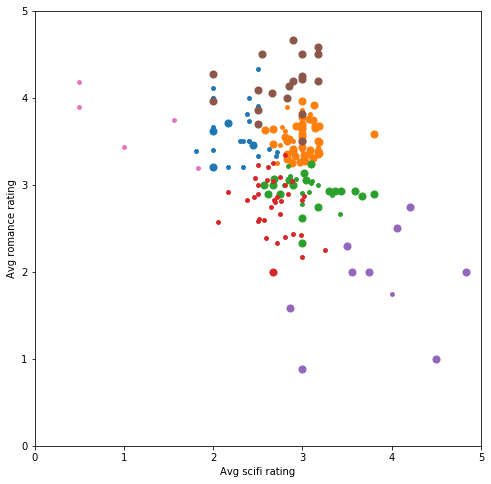

In [64]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [67]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on = 'movieId')
ratings_title.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


In [107]:
user_movie_ratings = pd.pivot_table(data = ratings_title, index = 'userId', columns = 'title', values = 'rating' )
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [110]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    most_rated_movies = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    most_rated_movies = most_rated_movies.sort_values(by = len(most_rated_movies) - 1, axis = 1, ascending = False)
    most_rated_movies = most_rated_movies.drop(most_rated_movies.tail(1).index, axis = 0)
    most_rated_movies = most_rated_movies.iloc[:,0:max_number_of_movies]
    return most_rated_movies

In [123]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    most_rated_movies['count'] = pd.Series(most_rated_movies.count(axis = 1))
    most_rated_movies.sort_values(by = 'count', ascending = False, axis = 0, inplace = True)
    most_rated_movies = most_rated_movies.iloc[0:max_number_of_movies,:]
    return most_rated_movies

In [126]:
n_movies = 30
n_users = 18
most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
most_rated_movies_users_selection = get_users_who_rate_the_most(most_rated_movies, n_users)
most_rated_movies_users_selection


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),count
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0,30
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0,30
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,30
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0,30
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0,30
22,4.5,4.5,5.0,4.5,4.5,3.5,4.0,3.0,3.5,3.5,...,3.5,4.0,4.5,NaN,5.0,4.0,3.5,4.0,4.0,29
460,4.0,4.5,5.0,5.0,4.5,5.0,4.5,3.5,4.0,5.0,...,5.0,4.0,5.0,1.5,5.0,4.5,3.0,2.5,NaN,29
267,5.0,5.0,3.5,5.0,5.0,4.5,4.5,5.0,5.0,5.0,...,4.5,3.5,4.0,5.0,4.5,5.0,4.5,4.0,3.0,29
561,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.0,5.0,...,4.5,5.0,4.5,4.5,4.0,5.0,4.5,4.0,4.0,29
354,5.0,4.5,5.0,4.5,5.0,3.5,5.0,3.0,4.0,4.0,...,5.0,3.5,5.0,4.0,5.0,4.5,3.0,3.5,4.0,29


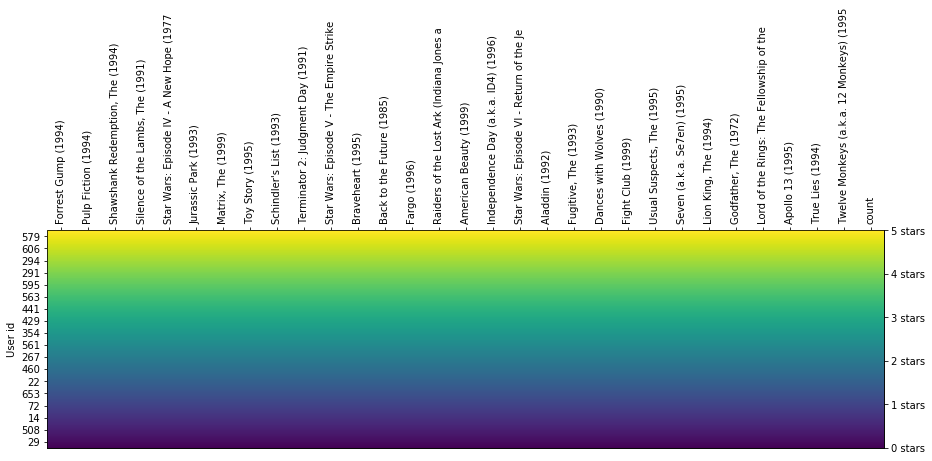

In [127]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [138]:
user_movie_ratings = pd.pivot_table(data = ratings_title, index = 'userId', columns = 'title', values = 'rating')
user_movie_ratings.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
most_rated_movies_1k = user_movie_ratings.append(user_movie_ratings.count(axis = 0), ignore_index = True)
most_rated_movies_1k = most_rated_movies_1k.sort_values(by = len(most_rated_movies_1k) - 1, axis = 1, ascending = False)
most_rated_movies_1k = most_rated_movies_1k.drop(most_rated_movies_1k.tail(1).index, axis = 0)
most_rated_movies_1k = most_rated_movies_1k.iloc[:, 0:1000]
most_rated_movies_1k.tail()





title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
666,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,5.0,5.0,NaN,NaN,4.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,5.0,NaN,5.0,NaN,4.5,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN


In [158]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [161]:
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(most_rated_movies_1k.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').